In [1]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

%matplotlib inline
import matplotlib.pyplot as plt

/home/juan/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


<AxesSubplot:xlabel='Date'>

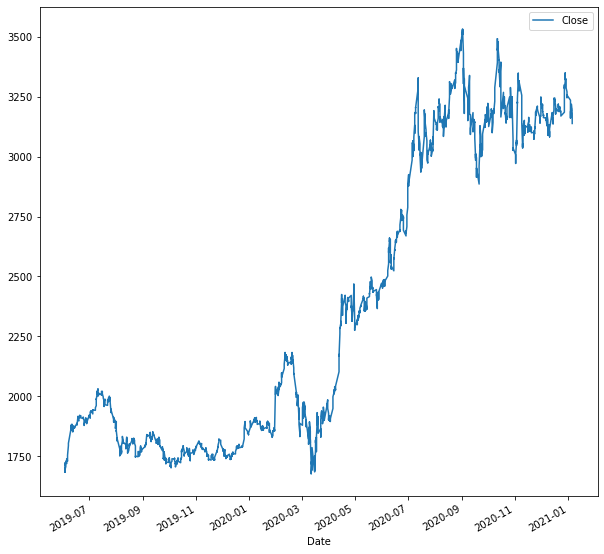

In [2]:
data=yf.download('AMZN',start='2019-06-01', interval='1h',  end='2021-01-07',progress=False)[['Close']]
data.head()
 
data.plot(figsize=(10,10))

In [3]:
cl = data.Close.astype('float32')
train = cl[0:int(len(cl)*0.90)]
scl = MinMaxScaler()
#Scale the data
scl.fit(train.values.reshape(-1,1))
cl =scl.transform(cl.values.reshape(-1,1))
#Create a function to process the data into lb observations look back slices
# and create the train test dataset (90-10)
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
lb=10
X,y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]
print(X_train.shape[0],X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])
print(y_train.shape[0])
print(y_test.shape[0])

2520 10
281 10
2520
281


In [ ]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(lb,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)
model.summary()

Epoch 1/300
79/79 [==============================] - 4s 25ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 2/300
79/79 [==============================] - 2s 23ms/step - loss: 0.0033 - val_loss: 3.3067e-04
Epoch 3/300
79/79 [==============================] - 1s 14ms/step - loss: 0.0010 - val_loss: 2.9699e-04
Epoch 4/300
79/79 [==============================] - 1s 14ms/step - loss: 0.0012 - val_loss: 4.1172e-04
Epoch 5/300
79/79 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 6/300
79/79 [==============================] - 1s 14ms/step - loss: 0.0025 - val_loss: 0.0033
Epoch 7/300
79/79 [==============================] - 3s 39ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 8/300
79/79 [==============================] - 1s 15ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 9/300
79/79 [==============================] - 1s 14ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 10/300
79/79 [==============================] - 1s 14ms/step - loss: 0.0021 - val_

Epoch 77/300
79/79 [==============================] - 3s 39ms/step - loss: 9.9878e-05 - val_loss: 1.5604e-04
Epoch 78/300
79/79 [==============================] - 1s 15ms/step - loss: 9.9012e-05 - val_loss: 1.5582e-04
Epoch 79/300
79/79 [==============================] - 1s 14ms/step - loss: 9.8489e-05 - val_loss: 1.5459e-04
Epoch 80/300
79/79 [==============================] - 1s 15ms/step - loss: 9.7588e-05 - val_loss: 1.5522e-04
Epoch 81/300
79/79 [==============================] - 1s 16ms/step - loss: 9.7216e-05 - val_loss: 1.5418e-04
Epoch 82/300
79/79 [==============================] - 2s 28ms/step - loss: 9.6513e-05 - val_loss: 1.5448e-04
Epoch 83/300
79/79 [==============================] - 1s 14ms/step - loss: 9.6089e-05 - val_loss: 1.5332e-04
Epoch 84/300
79/79 [==============================] - 1s 15ms/step - loss: 9.5267e-05 - val_loss: 1.5517e-04
Epoch 85/300
79/79 [==============================] - 2s 28ms/step - loss: 9.4852e-05 - val_loss: 1.5156e-04
Epoch 86/300
79/79 

In [ ]:
plt.figure(figsize=(12,8))
Xt = model.predict(X_train)
plt.plot(scl.inverse_transform(y_train.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Train Dataset")

In [ ]:
plt.figure(figsize=(12,8))
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Test Dataset")